In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#from plotly.offline import init_notebook_mode, iplot
#import plotly.graph_objs as go
import os
import warnings

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/2021 빅콘테스트_데이터분석분야_퓨처스리그_ECO제주_데이터_210811_update/데이터 전처리/ver_1_merge_data.csv", encoding='cp949')

# 시계열 피처단위로 변경
df['base_date'] = pd.to_datetime(df['base_date'])

# base_date를 index로 설정
df.index = df['base_date']
df

# 필요 없는 행 제거
data = df.drop(['base_date', 'long_term_frgn', 'short_term_frgn', 'resident', 'card_cnt', 'card_amt', 'waste_cnt', 'waste_amt'], 1)
data

,emd_cd,korean
base_date,,
2019-11-30,50110250,7.321788e+06
2019-12-31,50110250,6.915173e+06
2020-01-31,50110250,7.476137e+06
2020-02-29,50110250,5.561978e+06
2020-03-31,50110250,6.094369e+06
...,...,...
2021-02-28,50130620,4.321265e+06
2021-03-31,50130620,4.744309e+06
2021-04-30,50130620,5.236706e+06


In [3]:
# 한 행정동의 행만 추출
sub_area = data['emd_cd'] == 50110250

# base_date, korean 만 갖는 df 생성
sub_df = data[sub_area]
sub_df = sub_df.drop('emd_cd', 1)
sub_df

,korean
base_date,
2019-11-30,7.321788e+06
2019-12-31,6.915173e+06
2020-01-31,7.476137e+06
2020-02-29,5.561978e+06
2020-03-31,6.094369e+06
2020-04-30,5.684751e+06
2020-05-31,6.776586e+06
2020-06-30,7.621125e+06
2020-07-31,8.100981e+06


In [4]:
sub_df.to_dict('series')

{'korean': base_date
 2019-11-30    7.321788e+06
 2019-12-31    6.915173e+06
 2020-01-31    7.476137e+06
 2020-02-29    5.561978e+06
 2020-03-31    6.094369e+06
 2020-04-30    5.684751e+06
 2020-05-31    6.776586e+06
 2020-06-30    7.621125e+06
 2020-07-31    8.100981e+06
 2020-08-31    9.569720e+06
 2020-09-30    7.014126e+06
 2020-10-31    8.147031e+06
 2020-11-30    7.993247e+06
 2020-12-31    6.533004e+06
 2021-01-31    6.195203e+06
 2021-02-28    6.646771e+06
 2021-03-31    7.840074e+06
 2021-04-30    8.781502e+06
 2021-05-31    9.036917e+06
 2021-06-30    9.251269e+06
 Name: korean, dtype: float64}

# 전체 그래프 확인
plt.figure(figsize=(22,8))
plt.plot(sub_df.base_date, sub_df.korean)
plt.xlabel("date")
plt.ylabel("korean")
plt.show

<AxesSubplot:xlabel='base_date'>

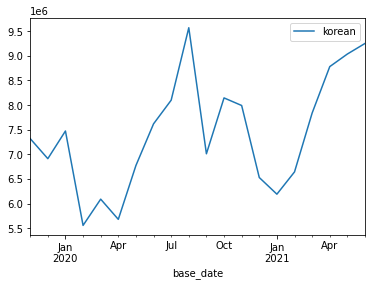

In [5]:
sub_df.plot()

<ipython-input-6-2e80ebd3cb73>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(sub_df['korean'], model='additive', freq=4) #분기별 데이터 4, 월별 데이터는 24, 맞춰가기


<Figure size 432x288 with 0 Axes>

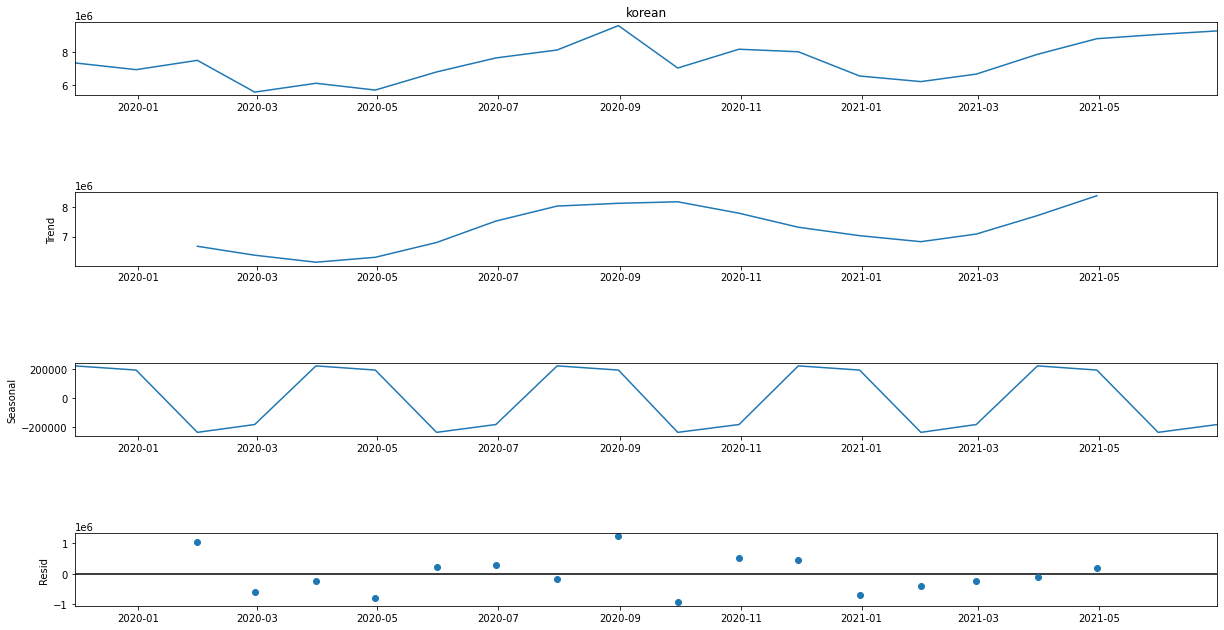

In [6]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sub_df['korean'], model='additive', freq=4) #분기별 데이터 4, 월별 데이터는 24, 맞춰가기

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)

In [7]:
# ARIMA에 적합한 float로 바꾸는 과정
sub_df_float = sub_df[:].astype(np.float)
#sub_df_float.tail()

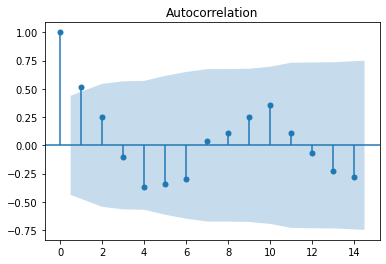

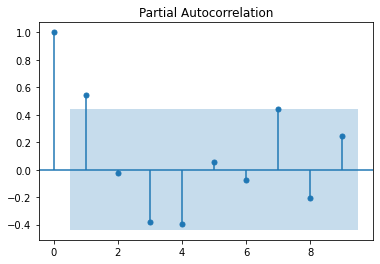

<Figure size 1440x288 with 0 Axes>

In [8]:
# 정상성 평가 - acf, pacf 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sub_df)
plot_pacf(sub_df, lags=9)
plt.figure(figsize=(20,4))
plt.show()

In [9]:
# ADF 검정 - 정상성 확인하는 검정 (귀무 : 정상성 만족 x, 대립 : 정상성 만족)

from statsmodels.tsa.stattools import adfuller
result = adfuller(sub_df)
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic : -1.846960
p-value : 0.357409
Critical Values :
	1%: -3.832603
	5%: -3.031227
	10%: -2.655520


p-value : 0.357409


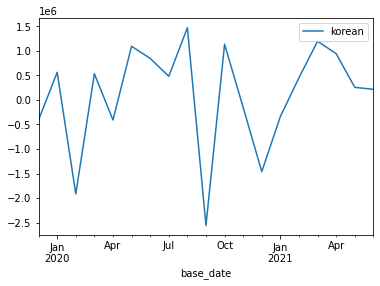

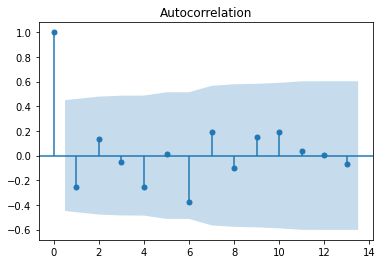

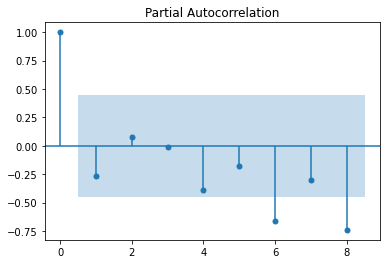

In [10]:
# 차분 1회 - 최대 2회
diff_1 = sub_df_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1, lags=8)
print('p-value : %f' % result[1])
plt.show()

In [11]:
# ADF 검정 - 정상성 확인하는 검정 (귀무 : 정상성 만족 x, 대립 : 정상성 만족)

from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_1)
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic : -5.231589
p-value : 0.000008
Critical Values :
	1%: -3.859073
	5%: -3.042046
	10%: -2.660906


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


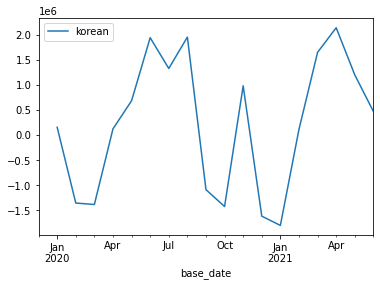

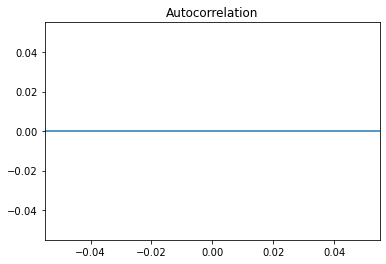

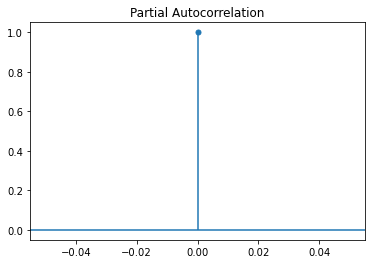

In [12]:
# 차분 2회 - 최대 2회
diff_2 = sub_df_float.diff(periods=2).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
plot_pacf(diff_2, lags=8)
plt.show()

In [13]:
# ARIMA 모델 

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.korean.values, order=(0,1,9))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1633
Model:                 ARIMA(0, 1, 9)   Log Likelihood              -25230.478
Method:                       css-mle   S.D. of innovations        1240918.624
Date:                Wed, 08 Sep 2021   AIC                          50482.956
Time:                        22:45:31   BIC                          50542.336
Sample:                             1   HQIC                         50504.983
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -989.9524   2.22e+04     -0.045      0.964   -4.45e+04    4.25e+04
ma.L1.D.y     -0.1741      0.025     -6.892      0.000      -0.224      -0.125
ma.L2.D.y      0.0500      0.026      1.958      0.0

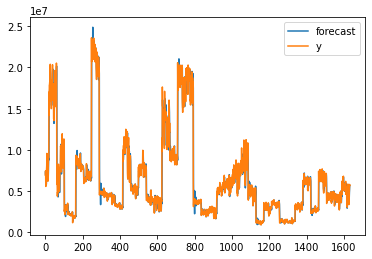

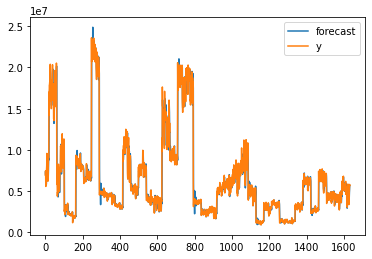

In [14]:
# ARIMA 예측모델 plot 확인
model_fit.plot_predict()

In [15]:
# 1단위 이후의 예측결과
fore = model_fit.forecast(steps=1)
print(fore)

(array([5359523.15663472]), array([1240918.6243636]), array([[2927367.34513708, 7791678.96813237]]))


In [16]:
# 2단위 이후의 예측결과
fore = model_fit.forecast(steps=1)
print(fore)

(array([5359523.15663472]), array([1240918.6243636]), array([[2927367.34513708, 7791678.96813237]]))
